In [1]:
'''Input!'''

def user():
    population = int(input('What is the approximate population size of your city/town? '))
    daily_rate = int(input('What was the daily increase of cases in your area? '))
    num_gen= int(input('The assumed generation time is 10 days, how many Generation do you want to go through: '))
    
    high_or_low = input('Would you like the R value to be a high or low estimate? ')
    if len(high_or_low)==3:
        low_estimate={'England':0.8, 'Northen Ireland':0.9, 'Scotland':0.8, 'Wales':0.8}
        country = input('What country in the UK is your town or city? ')
        R= low_estimate[country]
        return R, country, num_gen, daily_rate, population
    else:
        high_estimate={'England':1.0, 'Northen Ireland':1.1, 'Scotland':1.0, 'Wales':1.0}
        country = input('What country in the UK is your town or city? ')
        R = high_estimate[country]
        return R, country, num_gen, daily_rate, population

In [2]:
def calculations():
    R, country, num_gen, daily_rate, population = user()
    print('The R value for {} is {}. '.format(country, R))
    mr= 0.036
    print(num_gen)
    length= int(num_gen) + 1
    gen = range(1, length)
    all_cases = [daily_rate]
    total_immunity=[]
    total_death = []
    total_generation=[]
    for b in gen:
        if sum(all_cases)<=population:
                #equation we have to use if daily_rate or the amount of people who have cororna * r which equals 1+1.3 * change in time which for our gen is 10
            total_cases= daily_rate*(1+R)
            all_cases.append(total_cases)
            if sum(all_cases)>=population:
                total_generation.append(b)
                print('All members of your population will have had the virus on generation {}.'.format(b))
                all_cases.remove(total_cases)
                remain = population-sum(all_cases)
                death= (remain)*0.036
                total_death.append(death)
                immunity = remain - death
                total_immunity.append(immunity)
                print('In generation final ({}) generation, the remaining individuals in the population received corona so there was {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(b, remain, 
                                                                                                                                                   daily_rate, immunity, death))
                print('After {} generation(s) of COVID, {:.0f} number of people will be immune.'.format(b,sum(total_immunity)))
                break
            else:
                death =  (total_cases)*0.036
                total_death.append(death)
                immunity = total_cases - death
                total_immunity.append(immunity)
                immunity_chance = sum(total_immunity)/population
                immunity_cases = total_cases*immunity_chance
                total_cases = total_cases - immunity_cases
                print('In generation {}, there were {:.0f} cases, after an increase of {:.0f}. {:.0f} people became immune, and {:.0f} died.'.format(b, total_cases, 
                                                                                                                       daily_rate, immunity, death))
                print('After {} generation(s) of COVID, {:.0f} number of people will be immune.'.format(b,sum(total_immunity))) 
                daily_rate = total_cases
                all_cases
                print(' ')
                total_generation.append(b)
    return all_cases, total_immunity, total_death, total_generation

In [3]:
def table():
    all_cases, total_immunity, total_death, total_generation = calculations()
    print(total_generation)
    import pandas as pd
    import numpy as np
    data = {
    'Number of Generations': total_generation,
    'Number of individuals with immunity': total_immunity
        }
    
    table = pd.DataFrame(data)
    print(table)
    numpy_array = table.to_numpy()
    
    decide= input('Do you want to save the report to a file? Enter yes or no: ') #ask if they want to save a file
    if len(decide)==3: #If they input yes
        #currently only input that works is Gen
        file_name= input('What is your file name? ') #user needs to provide a file name
        
        how = input('How would you like your file to be opened? Enter append or write: ') #ask how they want the data to be saved
        confirm_how = input('Confirm editing format with yes or no: ') #ask for confirmation
        if len(confirm_how)==2:#if enter no
            how = input('How would you like your file to be opened? Enter append or write: ') #allowed to enter again
        if len(how)== 5: #write the following into the provided file
            file = open(file_name, 'w')
            np.savetxt(file_name , numpy_array, fmt = "%d")
            file.close()
            print('The program is complete.')
        else: #append the following into the provided file
            file= open(file_name, 'a')
            np.savetxt(file_name , numpy_array, fmt = "%d")
            file.close()
            print('The program is complete.')
                    
    else: #if the user doesn't want to save a file.
        print('Okay, the program is complete.')
    return file_name

In [4]:
import pandas as pd
table()
tdf= pd.read_csv("Gen",sep=" ")
tdf.shape
tdf=pd.read_csv("Gen",sep=" ",names=["Gen time", "Immunity"])
tdf.head()

What is the approximate population size of your city/town? 5000000
What was the daily increase of cases in your area? 692
The assumed generation time is 10 days, how many Generation do you want to go through: 5
Would you like the R value to be a high or low estimate? high
What country in the UK is your town or city? Scotland
The R value for Scotland is 1.0. 
5
In generation 1, there were 1384 cases, after an increase of 692. 1334 people became immune, and 50 died.
After 1 generation(s) of COVID, 1334 number of people will be immune.
 
In generation 2, there were 2765 cases, after an increase of 1384. 2668 people became immune, and 100 died.
After 2 generation(s) of COVID, 4002 number of people will be immune.
 
In generation 3, there were 5520 cases, after an increase of 2765. 5331 people became immune, and 199 died.
After 3 generation(s) of COVID, 9333 number of people will be immune.
 
In generation 4, there were 10995 cases, after an increase of 5520. 10642 people became immune, and

,Gen time,Immunity
0,1,1334
1,2,2667
2,3,5331
3,4,10642
4,5,21199


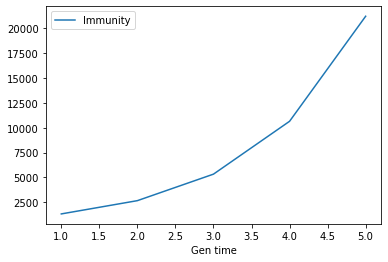

In [5]:
tdf.plot(x="Gen time",y="Immunity (No. of people)")